**Logistic Regression**
* Linear decision boundary with sklearn
* Non-linear polynomic decision boundary
* Literature

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.preprocessing import StandardScaler
from scipy.optimize import fmin_tnc
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [366]:
os.getcwd()

'/Users/apple/Downloads/machine-learning-ex2'

In [367]:
os.chdir("/Users/apple/Documents/!data analysis/Coursera training sets/")

In [368]:
data = pd.read_csv("ex2data1.txt", names = ["Exam 1 score", "Exam 2 score", "Result"])

In [354]:
data.describe()

,Exam 1 score,Exam 2 score,Result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


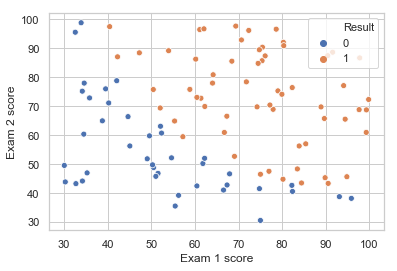

In [355]:
sns.scatterplot(data = data, x = "Exam 1 score", y = "Exam 2 score", hue = "Result")

In [356]:
X = data.iloc[:,[0,1]]
X = np.c_[np.ones(len(X)),X]
y = data.iloc[:,2]

In [357]:
model = LogisticRegression(solver="liblinear")
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(np.reshape(y, -1),predicted_classes)
parameters = model.coef_
print(predicted_classes, accuracy, parameters)

[0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1] 0.91 [[-2.85831439  0.05214733  0.04531467]]


**More Complex**

In [358]:
data_new = pd.read_csv("ex2data2.txt", names = ["Microchip test 1", "Microchip test 2", "Output"])

In [359]:
data_new.head(1)

,Microchip test 1,Microchip test 2,Output
0,0.051267,0.69956,1


In [360]:
data_new.describe()

,Microchip test 1,Microchip test 2,Output
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


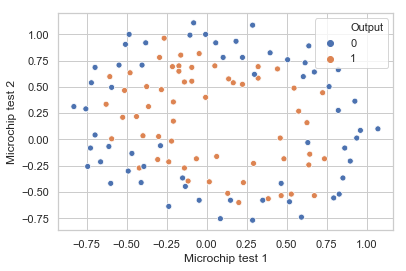

In [361]:
sns.scatterplot(data = data_new, x = "Microchip test 1", y = "Microchip test 2", hue = "Output" )

In [362]:
X = data_new.iloc[:,[0,1]]
#X = np.c_[np.ones(len(X)),X]
y = data_new.iloc[:,-1]

In [363]:
poly = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(118, 14)

In [364]:
model = LogisticRegression(solver="lbfgs")
model.fit(X_poly, y)
predicted_classes = model.predict(X_poly)
accuracy = accuracy_score(np.reshape(y, -1),predicted_classes)
parameters = model.coef_
print(predicted_classes, accuracy, parameters)

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1] 0.8220338983050848 [[ 0.56747156  1.11837431 -2.20662659 -0.92836244 -1.6252628  -0.03667275
  -0.36900193 -0.33630315 -0.47653708 -1.67881155 -0.05987698 -0.6266961
  -0.26315116 -1.5484978 ]]


**Documentation:**
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
* https://stackoverflow.com/questions/55937244/how-to-implement-polynomial-logistic-regression-in-scikit-learn